In [3]:
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
import matplotlib.patches as mptaches 
import seaborn as sns 
from node2vec import Node2Vec 
sns.set_style('whitegrid')
import pandas as pd 
import warnings

In [4]:
df = pd.read_csv("daop1_fix.csv")

In [16]:
g = nx.from_pandas_edgelist(df, source='kereta', target='kota_kab_awal')

In [23]:
c = nx.from_pandas_edgelist(df, source='kereta', target='kota_kab_akhir')

In [63]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}

In [81]:
labels = [i for i in dict(c.nodes).keys()]
labels = {i:i for i in dict(c.nodes).keys()}

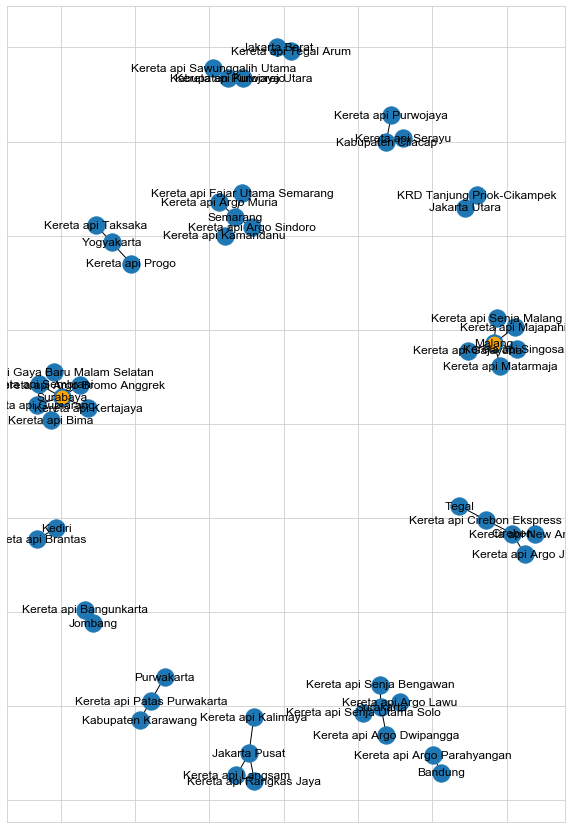

In [75]:
fig, ax = plt.subplots(figsize=(10,15))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout, ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
kotaawalpopuler = [person for person in df.kota_kab_awal if
g.degree(person) > 4]
nx.draw_networkx_nodes(g, layout,
nodelist=kotaawalpopuler, node_color='orange',
node_size=150)

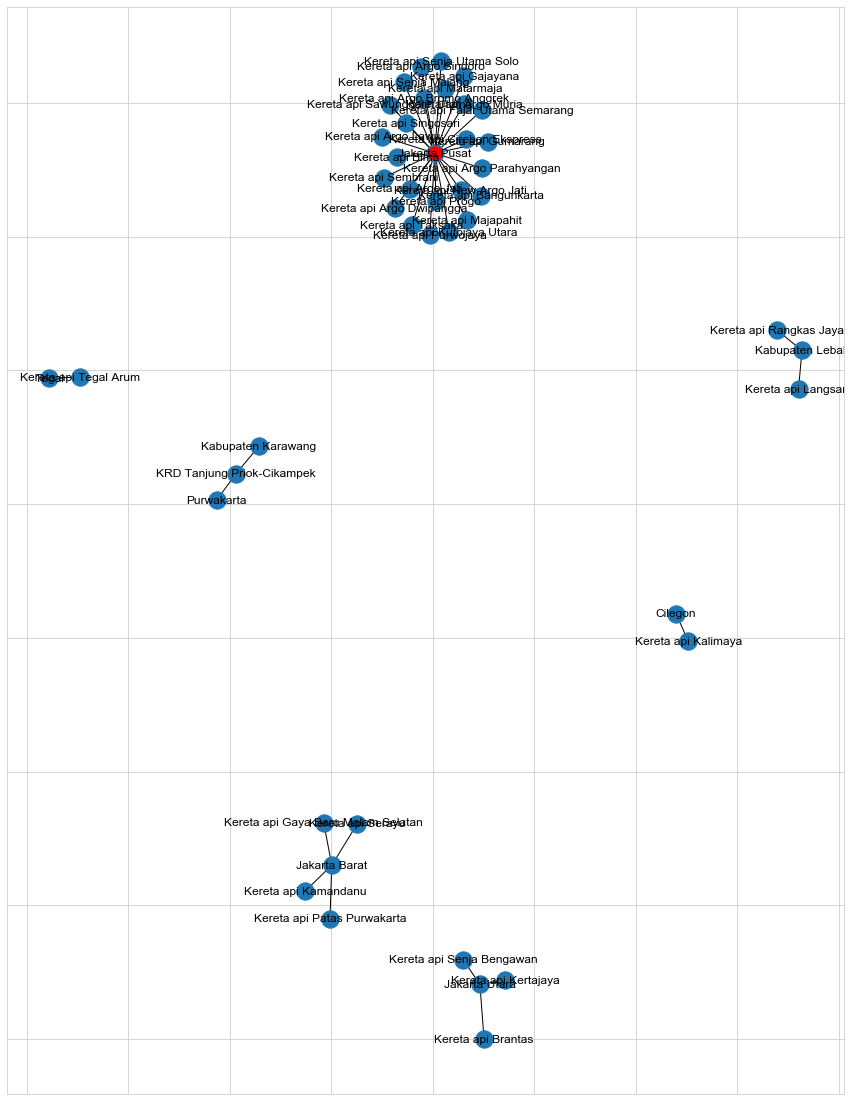

In [87]:
fig, ax = plt.subplots(figsize=(15,20))
layout = nx.spring_layout(c,iterations=50)
nx.draw_networkx_nodes(c, layout, ax = ax, labels=True)
nx.draw_networkx_edges(c, layout, ax=ax)
_ = nx.draw_networkx_labels(c, layout, labels, ax=ax)
kotaakhirpopuler = [person for person in df.kota_kab_akhir if
c.degree(person) > 4]
nx.draw_networkx_nodes(c, layout,
nodelist=kotaakhirpopuler, node_color='red',
node_size=150)

In [85]:
density = nx.density(g)
degree_dict = dict(g.degree(g.nodes()))

(-1.0404629633184912,
 1.047442464917053,
 -1.1026976543154514,
 1.0554734043478013)

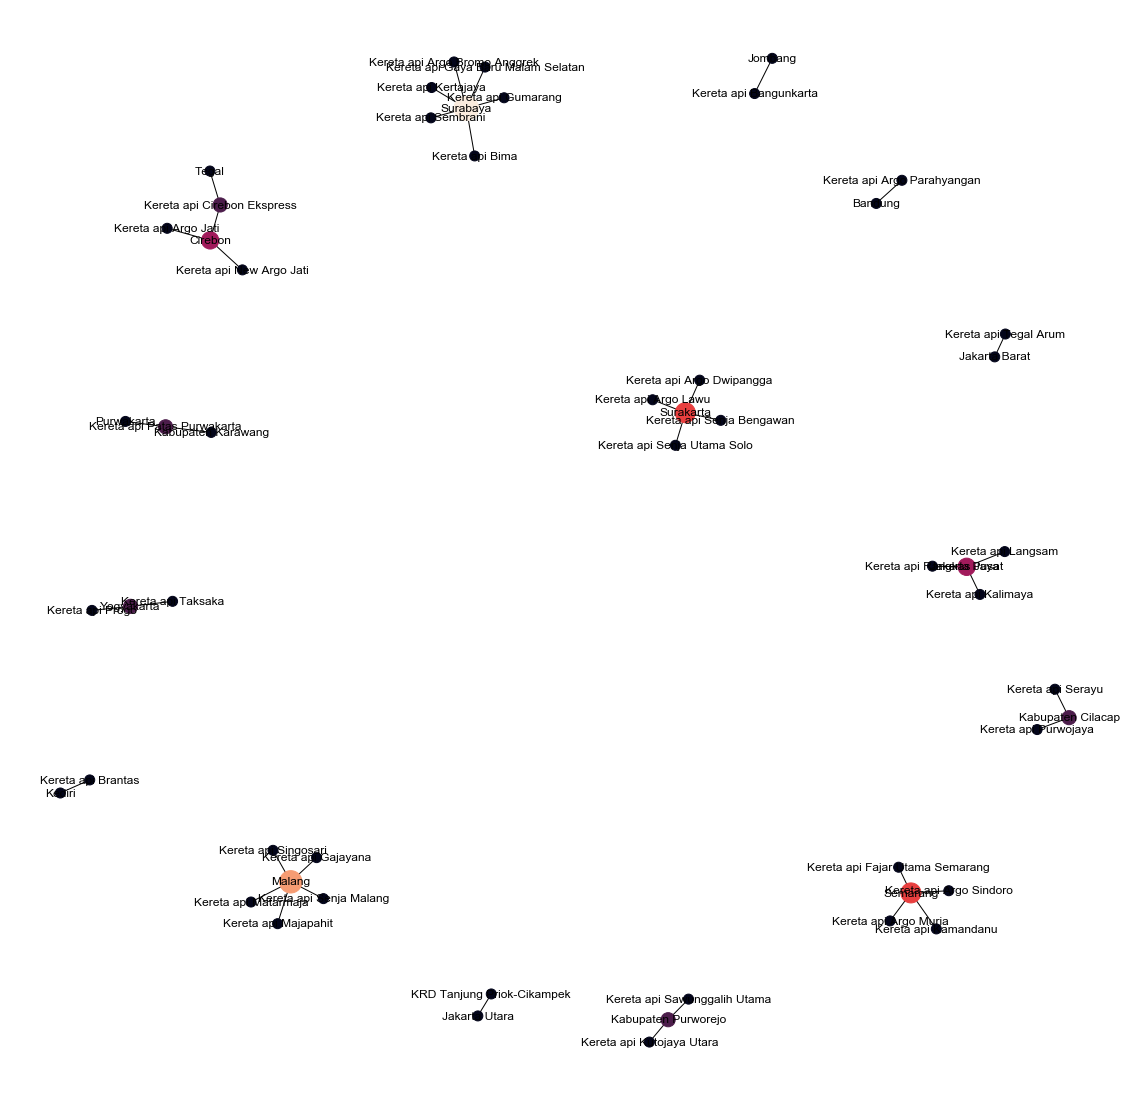

In [86]:
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size = [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,
node_color=node_color,
node_size=node_size )
plt.axis('off')

In [88]:
density1 = nx.density(c)
degree_dict1 = dict(c.degree(c.nodes()))

(-1.0576000297347212,
 1.0462361054662728,
 -1.1003804197064107,
 1.0068114775579458)

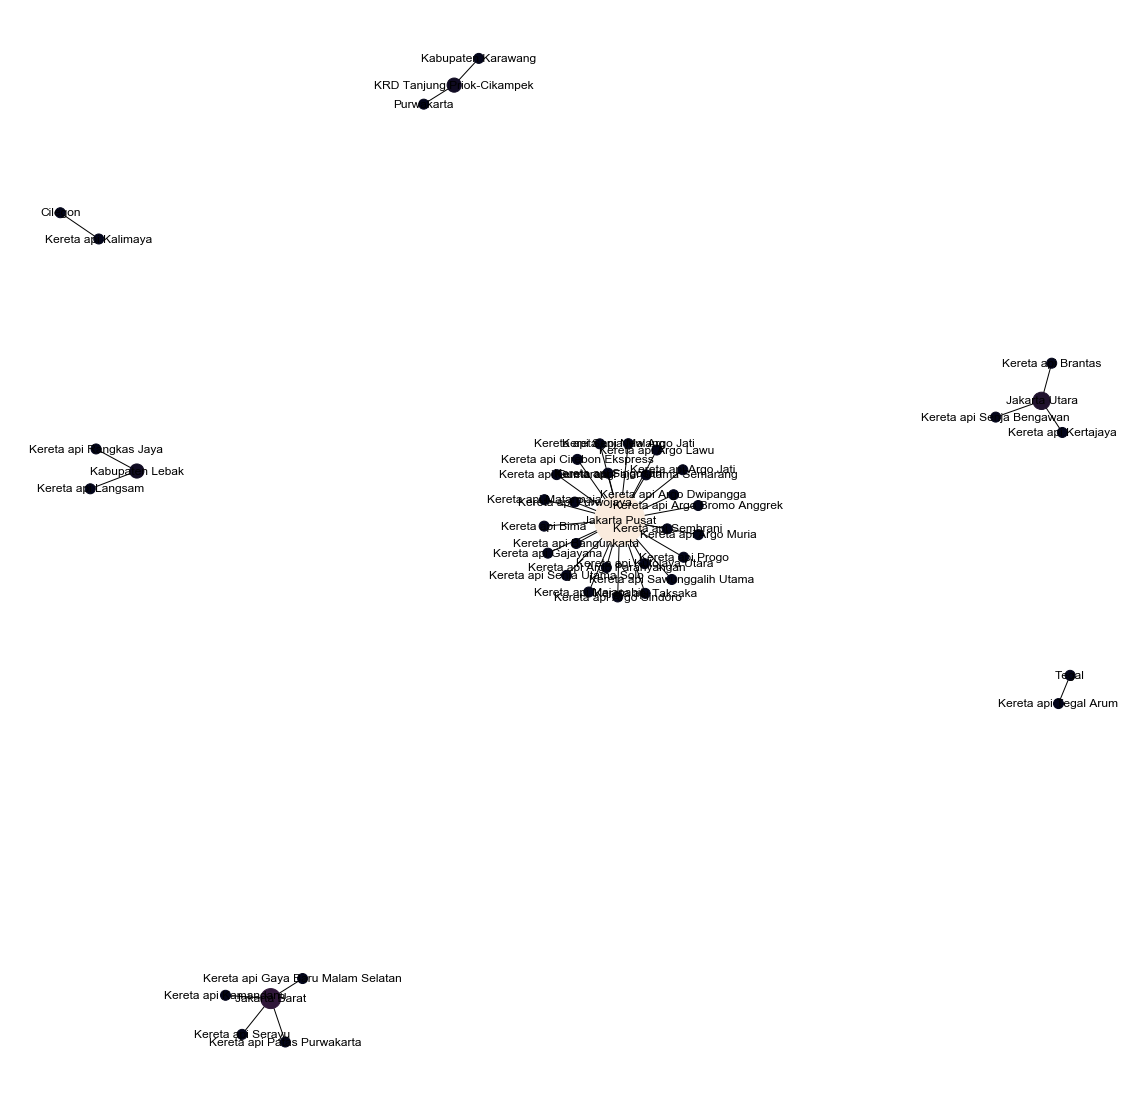

In [89]:
pos = nx.spring_layout(c)
node_color = [20000.0 * c.degree(v) for v in c]
node_size = [v * 100 for v in degree_dict1.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(c, pos=pos, with_labels=True,
node_color=node_color,
node_size=node_size )
plt.axis('off')

(-0.8440397102278864,
 0.7775803537252957,
 -1.088184096767017,
 0.5906272731652301)

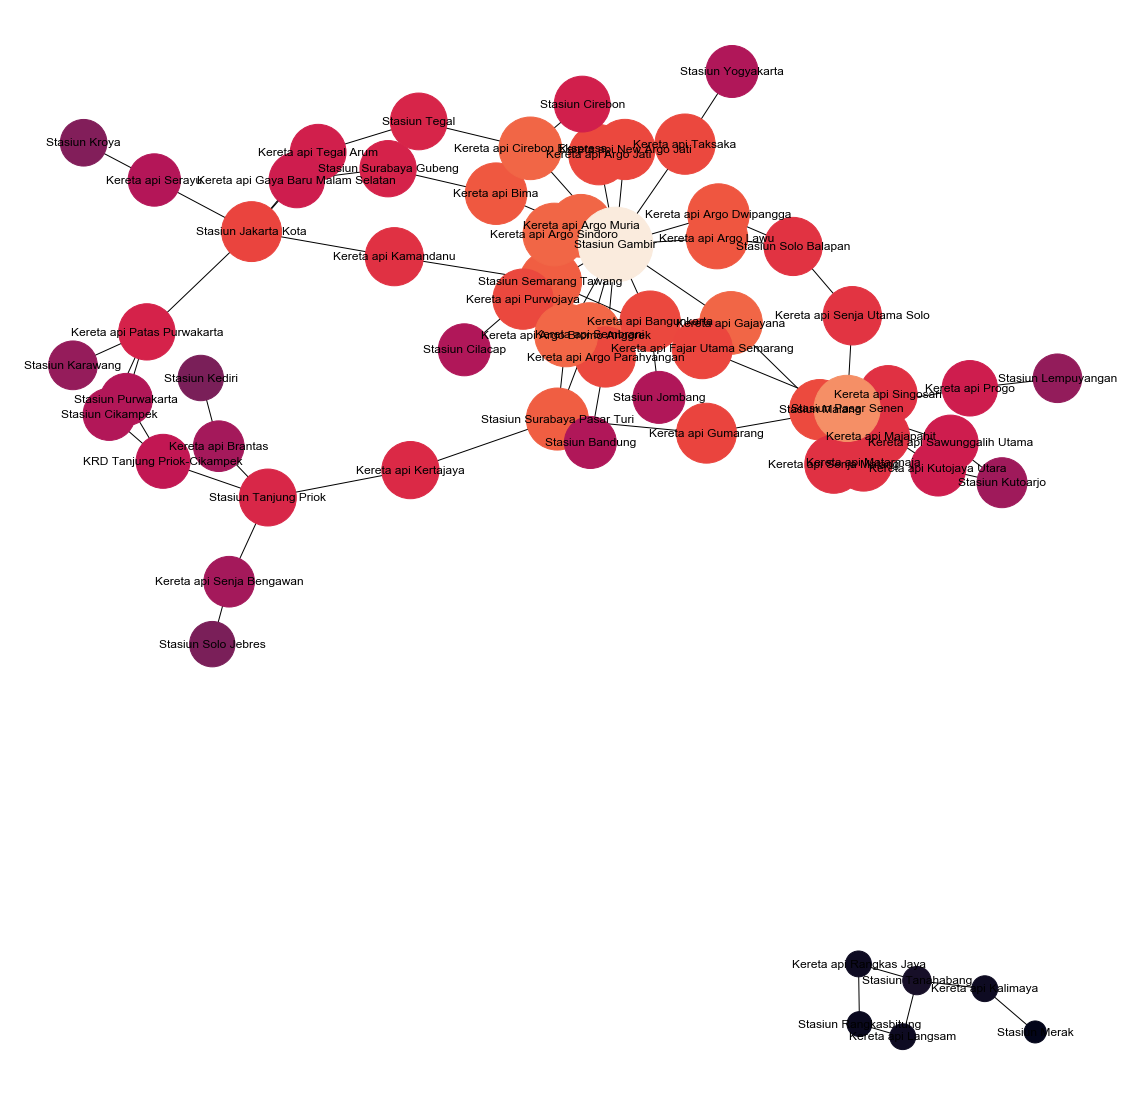

In [42]:
harmonic_dict = nx.harmonic_centrality(g)
nx.set_node_attributes(g, harmonic_dict, 'harmonic')
pos = nx.spring_layout(g)
node_color = [20000.0 * harmonic_dict[v] for v in g]
node_size = [v * 200 for v in harmonic_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,
node_color=node_color,
node_size=node_size )
plt.axis('off')

(-1.0991912000376387,
 0.9436213908790876,
 -0.981285103268585,
 1.0910852965630349)

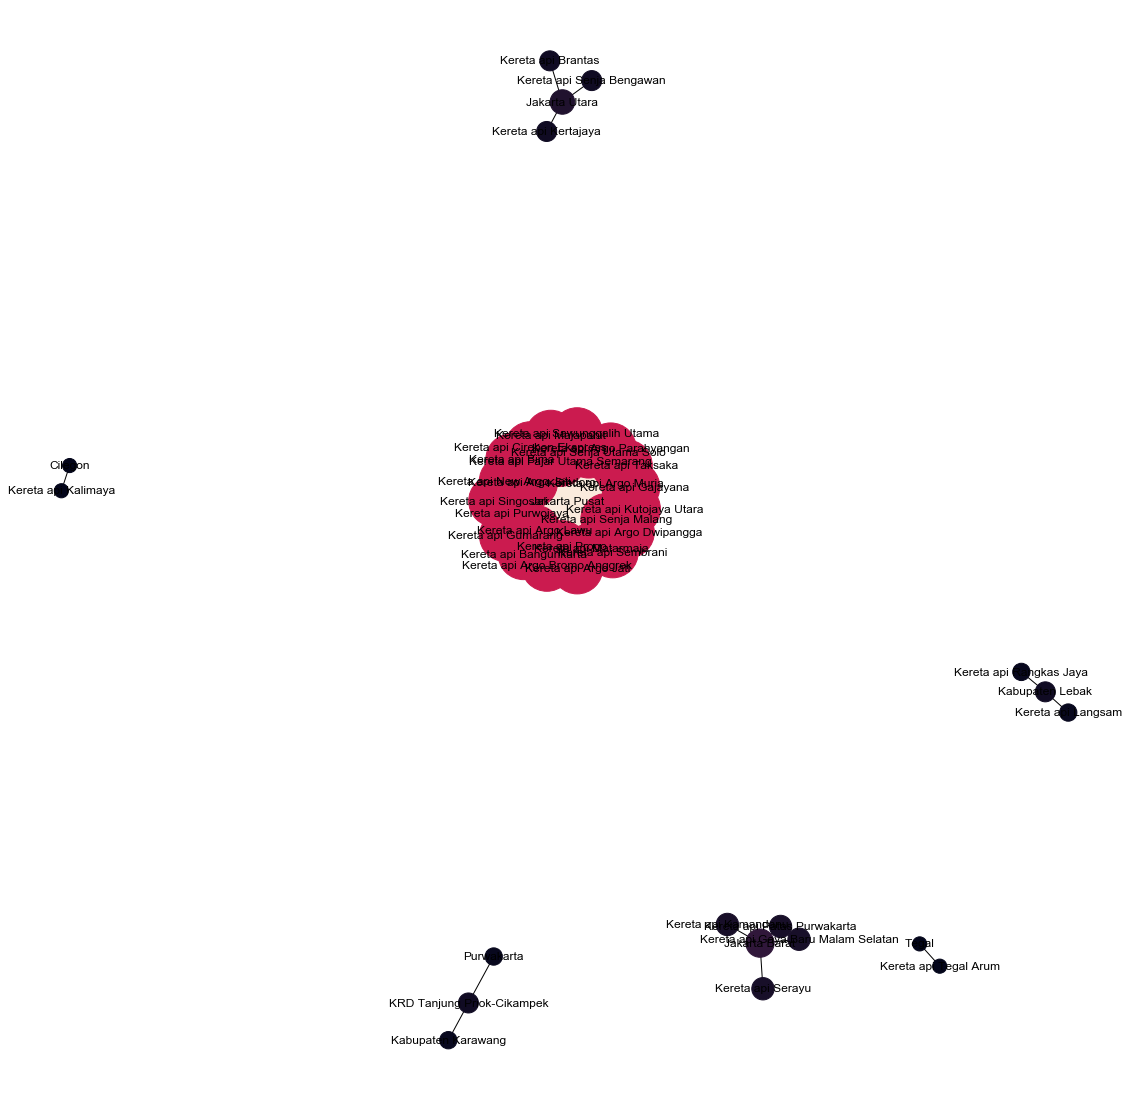

In [93]:
harmonic_dict1 = nx.harmonic_centrality(c)
nx.set_node_attributes(c, harmonic_dict1, 'harmonic')
pos = nx.spring_layout(c)
node_color = [20000.0 * harmonic_dict1[v] for v in c]
node_size = [v * 200 for v in harmonic_dict1.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(c, pos=pos, with_labels=True,
node_color=node_color,
node_size=node_size )
plt.axis('off')

In [94]:
urutan_harmonic = sorted(harmonic_dict.items(), key=itemgetter(1), reverse=True)
print("lima besar by harmonic:")
for b in urutan_harmonic[:5]:
    print(b)

NameError: name 'itemgetter' is not defined

In [95]:
node2vec = Node2Vec(g, dimensions=20,
walk_length=16, num_walks=100, workers=2)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities: 100%|███████████████████████████████████████████| 54/54 [00:00<00:00, 26985.87it/s]


In [9]:
nodekereta = [x for x in df.kereta]

In [10]:
embeddings = np.array([model.wv[x] for x in nodekereta])

In [11]:
tsne = TSNE(n_components=2, random_state=7,perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [102]:
warna_kotakabawal = {
 'Jakarta Barat': 'lightblue',
 'Jakarta Utara': 'b',
 'Jakarta Pusat': 'r',
 'Semarang': 'teal',
 'Surakarta': 'gray',
 'Jombang':  'pink', 
 'Surabaya': 'black',
 'Malang': 'lightgray',
 'Kabupaten Cilacap': '#f0f0f0',
 'Yogyakarta': '#f0f5d6',
 'Cirebon': '#b7f751',
 'Bandung': '#d7b756',
 'Tegal': '#bf67d8', 
 'Kabupaten Karawang': '#696969',
 'Purwakarta' : '#ff4040',
 'Kabupaten Purworejo':'#008b45',
 'Kediri': '#3e5c7a'}

df['color'] = df['kota_kab_awal'].apply(lambda x: warna_kotakabawal[x])
warna_kereta= dict(zip(df['kereta'], df['color']))
colors = [warna_kereta[x] for x in df.kereta]

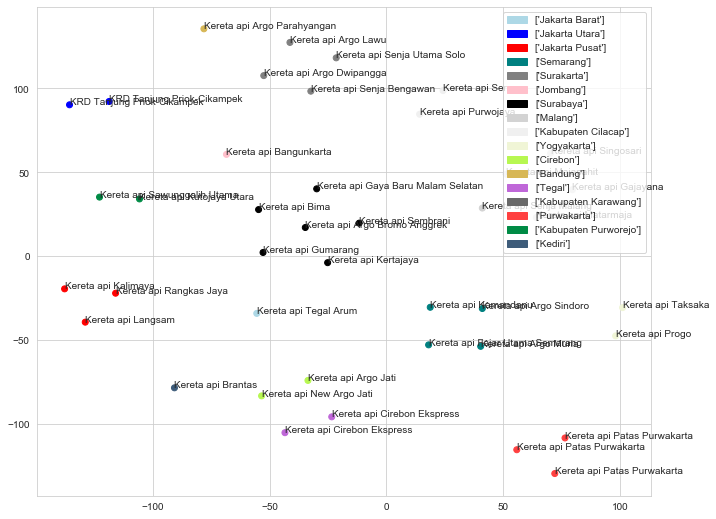

In [103]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)

i=0
for keretaku in nodekereta:
 ax.annotate(keretaku, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
 i=i+1
    
kotakabawal_legend = [mptaches.Patch(color=color, label=df.kota_kab_awal.unique())
for df.kota_kab_awal, color in warna_kotakabawal.items()]
ax.legend(handles=kotakabawal_legend);

In [8]:
node2vec = Node2Vec(c, dimensions=20,
walk_length=16, num_walks=100, workers=2)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities: 100%|███████████████████████████████████████████| 45/45 [00:00<00:00, 15030.95it/s]


In [12]:
warna_kotakabakhir = {
 'Jakarta Barat': 'lightblue',
 'Jakarta Utara': 'b',
 'Jakarta Pusat': 'r', 
 'Cilegon': 'black',
 'Kabupaten Lebak': '#f0f0f0',
 'Tegal': '#bf67d8', 
 'Kabupaten Karawang': '#696969',
 'Purwakarta' : '#ff4040'}

df['color'] = df['kota_kab_akhir'].apply(lambda x: warna_kotakabakhir[x])
warna_kereta= dict(zip(df['kereta'], df['color']))
colors = [warna_kereta[x] for x in df.kereta]

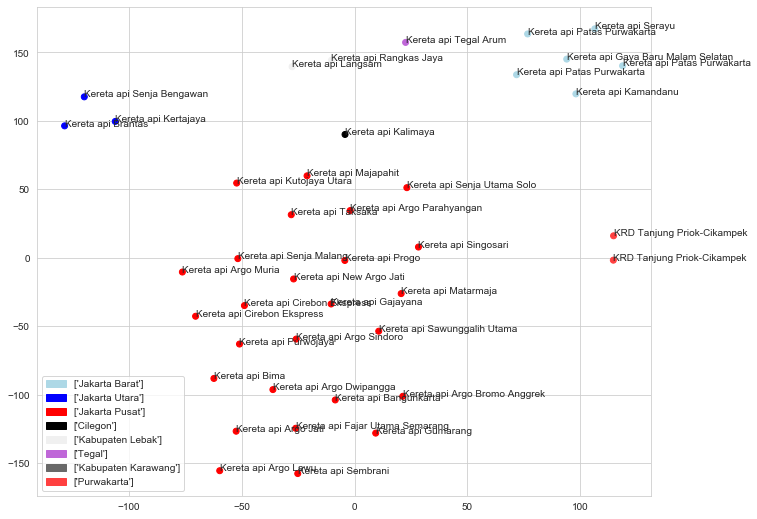

In [13]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)

i=0
for keretaku in nodekereta:
 ax.annotate(keretaku, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
 i=i+1
    
kotakabakhir_legend = [mptaches.Patch(color=color, label=df.kota_kab_akhir.unique())
for df.kota_kab_akhir, color in warna_kotakabakhir.items()]
ax.legend(handles=kotakabakhir_legend);

In [18]:
density = nx.density(g)
print("Network density:", density)

Network density: 0.027253668763102725


In [19]:
density = nx.density(c)
print("Network density:", density)

Network density: 0.05263157894736842


(-1.1107159180128616,
 1.0542518045361213,
 -1.0255957107810998,
 0.9763282005328905)

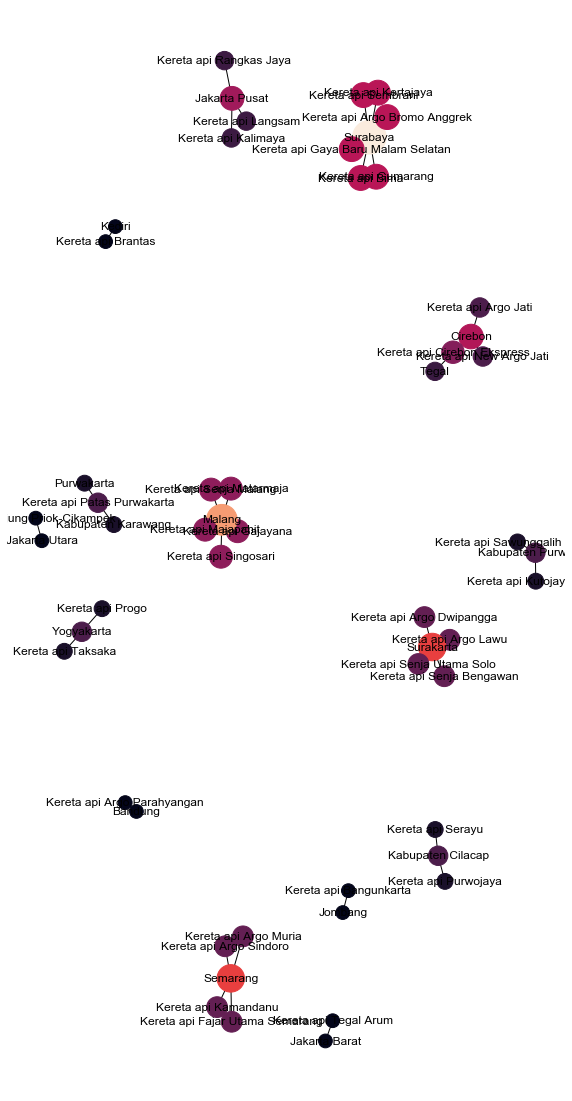

In [25]:
closeness_dict=nx.closeness_centrality(g)
nx.set_node_attributes(g, closeness_dict, 'closeness')
pos = nx.spring_layout(g)
node_color = [20000.0 * closeness_dict[v] for v in g]
node_size =  [v * 10000 for v in closeness_dict.values()]
plt.figure(figsize=(10,20))
nx.draw_networkx(g, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off') 

(-1.1348839949973886,
 1.1350766936999315,
 -1.1266570915538303,
 1.1113909731591636)

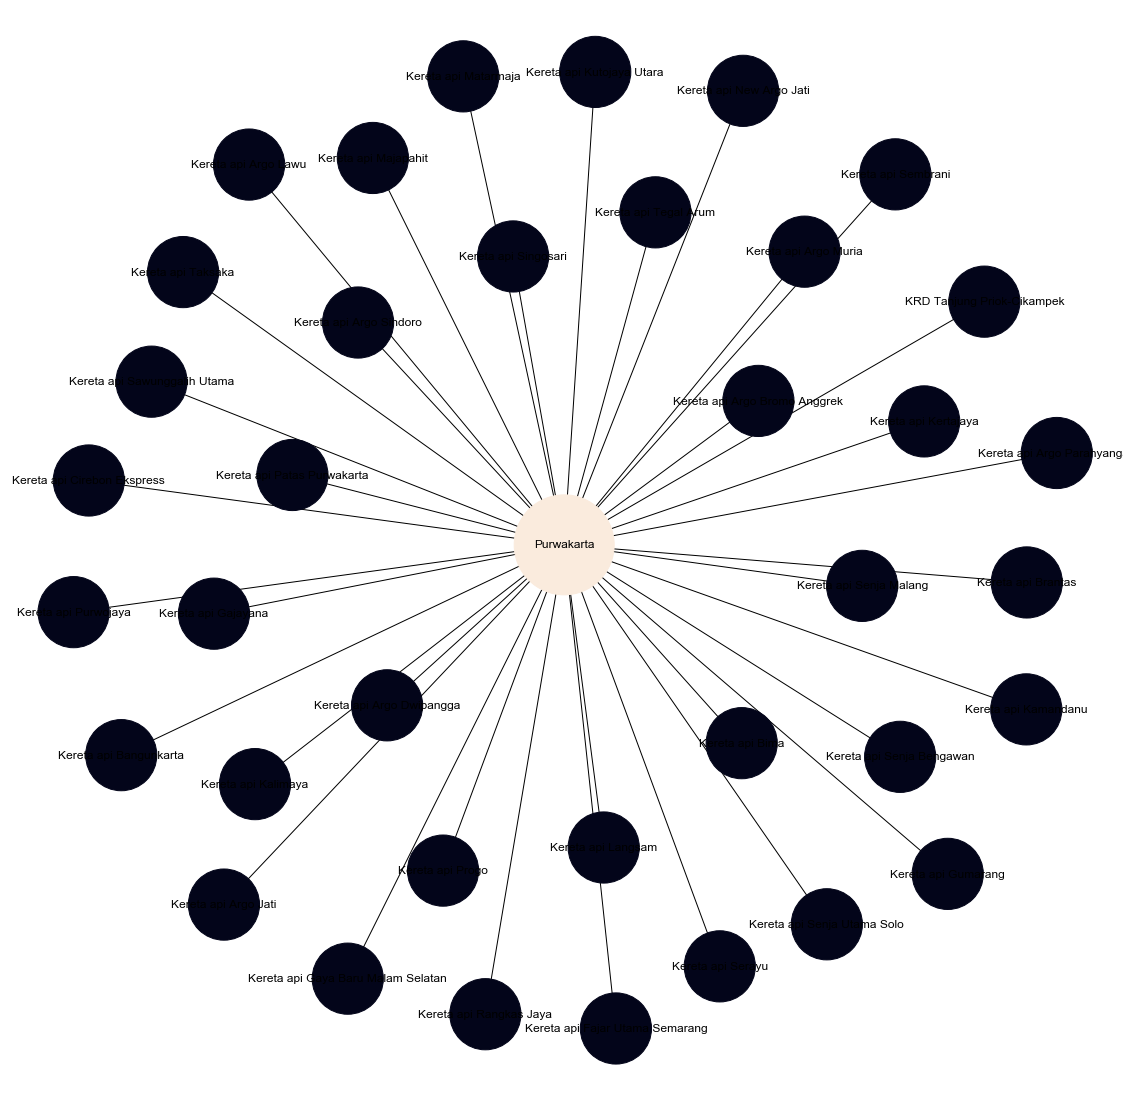

In [26]:
closeness_dict=nx.closeness_centrality(c)
nx.set_node_attributes(c, closeness_dict, 'closeness')
pos = nx.spring_layout(c)
node_color = [20000.0 * closeness_dict[v] for v in c]
node_size =  [v * 10000 for v in closeness_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(c, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off') 